# *Import Library*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import missingno as msno

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

# *DATASET UPLOAD*

In [2]:
columnname = pd.read_excel("features.xlsx")
column = columnname["degiskenismi"]

In [3]:
x_train = pd.read_excel("final_x_train.xlsx", names = column)
x_test = pd.read_excel("final_x_test.xlsx", names = column)
y_train = pd.read_excel("final_y_train.xlsx", names = ["activity"]) - 1
y_test = pd.read_excel("final_y_test.xlsx", names = ["activity"]) - 1

In [5]:
x_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.29,-0.02,-0.18,-0.48,-0.45,-0.24,-0.53,-0.48,-0.25,-0.06,...,0.21,-0.47,-0.85,-0.34,0.94,-0.60,0.49,-0.59,0.10,0.31
1,0.17,0.01,-0.05,-0.61,-0.54,-0.36,-0.65,-0.55,-0.34,-0.54,...,0.12,-0.51,-0.86,0.67,-0.45,0.41,0.44,-0.58,0.09,0.32
2,0.39,-0.03,-0.01,-0.68,-0.47,-0.42,-0.71,-0.50,-0.42,-0.47,...,0.10,-0.63,-0.94,-0.14,0.42,0.55,0.09,-0.60,0.08,0.31
3,0.35,-0.02,-0.00,-0.65,-0.46,-0.36,-0.70,-0.50,-0.35,-0.47,...,0.49,-0.24,-0.55,-0.04,0.34,0.61,-0.42,-0.64,0.09,0.28
4,0.25,-0.00,-0.14,-0.62,-0.54,-0.21,-0.68,-0.55,-0.17,-0.43,...,0.17,-0.22,-0.58,0.13,-0.91,0.65,-0.76,-0.67,0.09,0.26


In [7]:
x_train.shape

(4251, 561)

In [8]:
x_test.shape

(1491, 561)

In [9]:
x_train.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroMean,gravityMean)        float64
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Length: 561, dtype: object

### All variables are numeric

In [10]:
x_train.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

Text(0.5, 1.0, 'Train set')

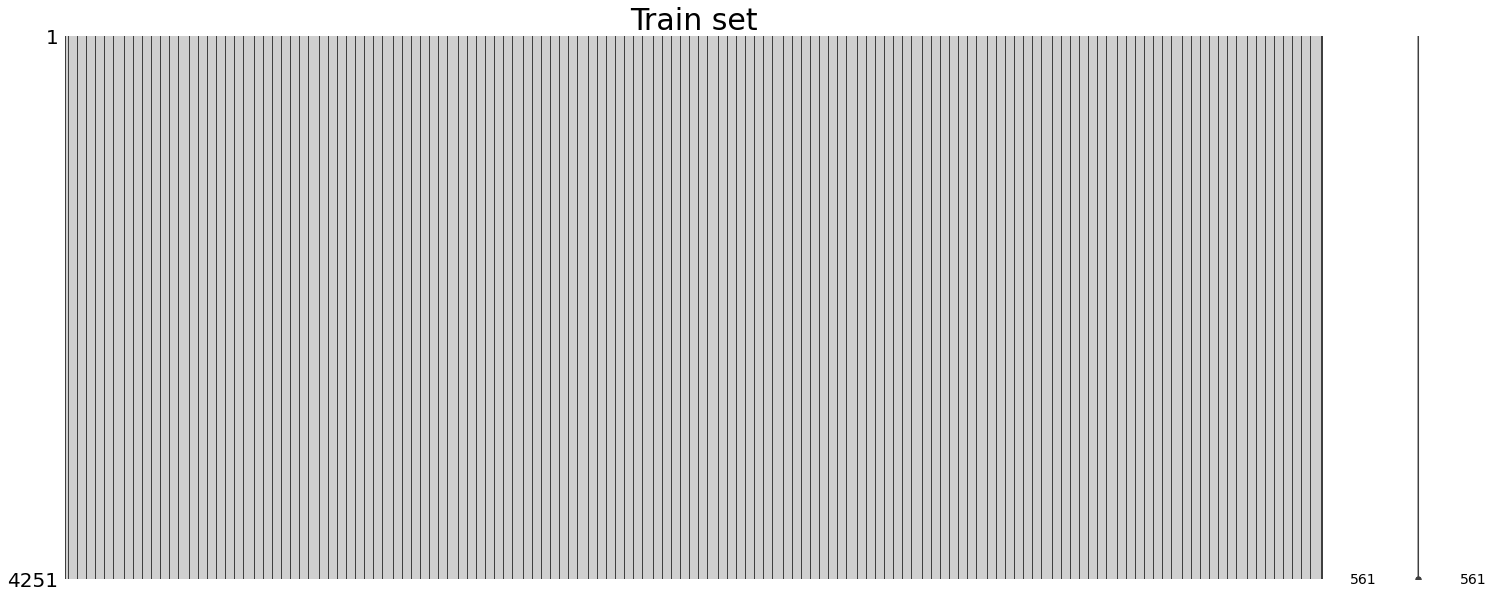

In [17]:
msno.matrix(x_train).set_title("Train Set Missing Map",fontsize=30)

### There is no missing Value ( NA ) here

Text(0.5, 1.0, 'Test Set Missing Map')

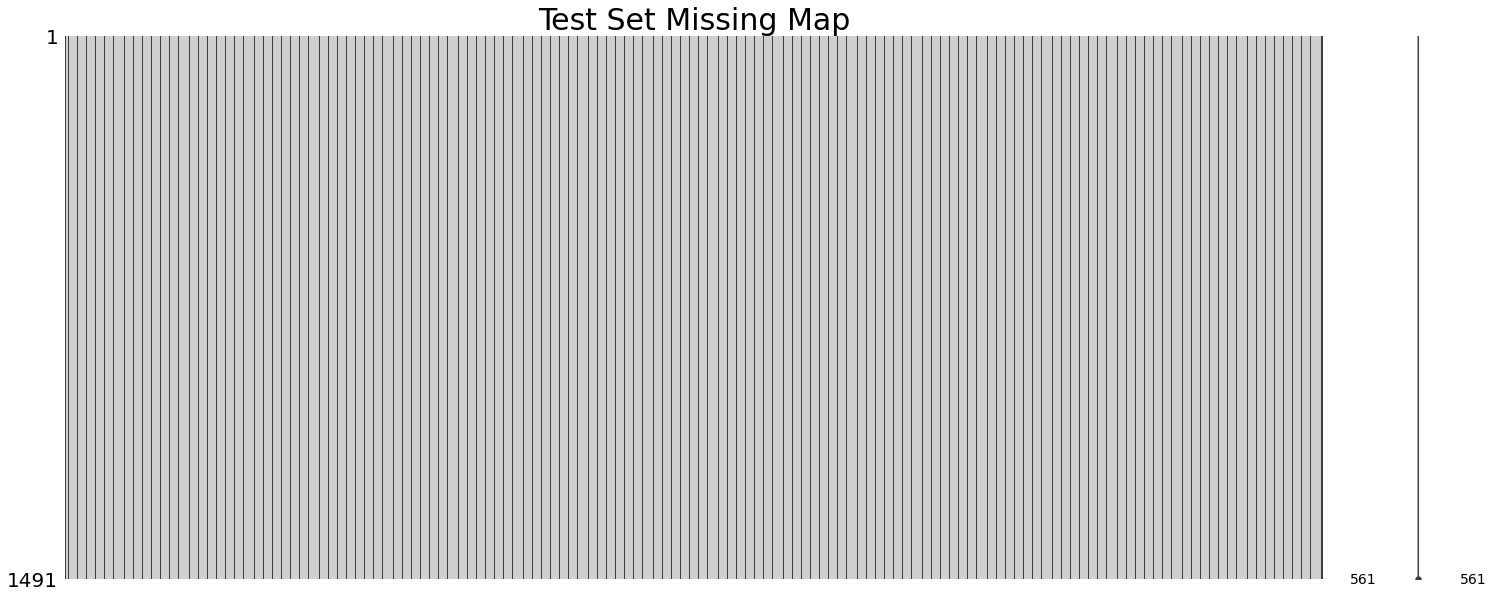

In [6]:
msno.matrix(x_test).set_title("Test Set Missing Map",fontsize=30)

### There is no missing Value ( NA ) here

In [13]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen data framee.
    cat_th: int, float
    numerik fakat kategorik olan değişkenler için sınıf eşif değeri
    car_th: int, float
    kategorik fakat kardinal değişkenler için sınıf eşik değeri
    Returns
    -------
    cat_cols: list
        Lategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_card:
        Kategorik görünümlü kardinal değişken listesi
    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_card  cat_cols'un içinde
    Return olan 3 liste toplamı toplam değişken sayısına eşittir
    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["category","object","bool"]]
    num_cat_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["int64","int32","float64","float32"]
                    and dataframe[col].nunique() < cat_th]
    cat_cols += num_cat_cols

    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtype in ["category","object"]
                   and dataframe[col].nunique() > car_th]

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["int64","float64"]
                and dataframe[col].nunique() > cat_th]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_cat_cols: {len(num_cat_cols)}")

    return cat_cols,num_cols,cat_but_car




In [14]:
cat_cols,num_cols,cat_but_car = grab_col_names(x_train)

Observations: 4251
Variables: 561
cat_cols: 0
num_cols: 561
cat_but_car: 0
num_cat_cols: 0


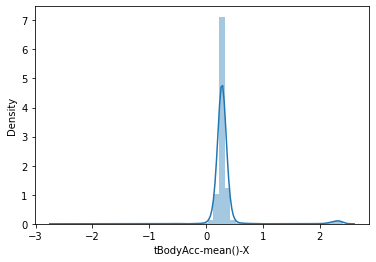

In [6]:
sns.distplot(x_train["tBodyAcc-mean()-X"])
plt.show()

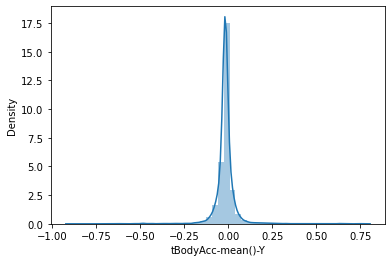

In [8]:
sns.distplot(x_train["tBodyAcc-mean()-Y"])
plt.show()

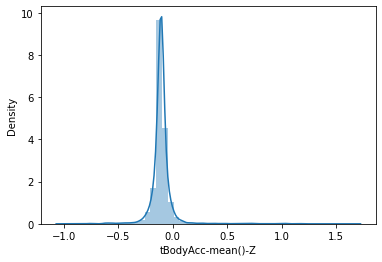

In [9]:
sns.distplot(x_train["tBodyAcc-mean()-Z"])
plt.show()

# OUTLIER

In [39]:
# Threshold setting function
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    low_limit = quartile1 - 1.5*iqr
    up_limit = quartile3 + 1.5*iqr
    return low_limit,up_limit




# Is there an outlier or not?
def check_outlier(dataframe,col_name):
    low,up = outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name] < low) | (dataframe[col_name]>up)].any(axis=None):
        return True
    else:
        return False

In [40]:
for col in x_train.columns:
    print(col,":",check_outlier(x_train,col))

tBodyAcc-mean()-X : True
tBodyAcc-mean()-Y : True
tBodyAcc-mean()-Z : True
tBodyAcc-std()-X : True
tBodyAcc-std()-Y : True
tBodyAcc-std()-Z : True
tBodyAcc-mad()-X : True
tBodyAcc-mad()-Y : True
tBodyAcc-mad()-Z : True
tBodyAcc-max()-X : True
tBodyAcc-max()-Y : True
tBodyAcc-max()-Z : True
tBodyAcc-min()-X : True
tBodyAcc-min()-Y : True
tBodyAcc-min()-Z : True
tBodyAcc-sma() : True
tBodyAcc-energy()-X : True
tBodyAcc-energy()-Y : True
tBodyAcc-energy()-Z : True
tBodyAcc-iqr()-X : True
tBodyAcc-iqr()-Y : True
tBodyAcc-iqr()-Z : True
tBodyAcc-entropy()-X : False
tBodyAcc-entropy()-Y : False
tBodyAcc-entropy()-Z : False
tBodyAcc-arCoeff()-X,1 : True
tBodyAcc-arCoeff()-X,2 : True
tBodyAcc-arCoeff()-X,3 : True
tBodyAcc-arCoeff()-X,4 : True
tBodyAcc-arCoeff()-Y,1 : True
tBodyAcc-arCoeff()-Y,2 : True
tBodyAcc-arCoeff()-Y,3 : True
tBodyAcc-arCoeff()-Y,4 : True
tBodyAcc-arCoeff()-Z,1 : True
tBodyAcc-arCoeff()-Z,2 : True
tBodyAcc-arCoeff()-Z,3 : True
tBodyAcc-arCoeff()-Z,4 : True
tBodyAcc-correl

fBodyAcc-sma() : False
fBodyAcc-energy()-X : True
fBodyAcc-energy()-Y : True
fBodyAcc-energy()-Z : True
fBodyAcc-iqr()-X : True
fBodyAcc-iqr()-Y : True
fBodyAcc-iqr()-Z : True
fBodyAcc-entropy()-X : False
fBodyAcc-entropy()-Y : False
fBodyAcc-entropy()-Z : False
fBodyAcc-maxInds-X : True
fBodyAcc-maxInds-Y : True
fBodyAcc-maxInds-Z : True
fBodyAcc-meanFreq()-X : True
fBodyAcc-meanFreq()-Y : True
fBodyAcc-meanFreq()-Z : True
fBodyAcc-skewness()-X : True
fBodyAcc-kurtosis()-X : True
fBodyAcc-skewness()-Y : True
fBodyAcc-kurtosis()-Y : True
fBodyAcc-skewness()-Z : True
fBodyAcc-kurtosis()-Z : True
fBodyAcc-bandsEnergy()-1,8 : True
fBodyAcc-bandsEnergy()-9,16 : True
fBodyAcc-bandsEnergy()-17,24 : True
fBodyAcc-bandsEnergy()-25,32 : True
fBodyAcc-bandsEnergy()-33,40 : True
fBodyAcc-bandsEnergy()-41,48 : True
fBodyAcc-bandsEnergy()-49,56 : True
fBodyAcc-bandsEnergy()-57,64 : True
fBodyAcc-bandsEnergy()-1,16 : True
fBodyAcc-bandsEnergy()-17,32 : True
fBodyAcc-bandsEnergy()-33,48 : True
fBodyA

fBodyBodyGyroMag-maxInds : True
fBodyBodyGyroMag-meanFreq() : True
fBodyBodyGyroMag-skewness() : True
fBodyBodyGyroMag-kurtosis() : True
fBodyBodyGyroJerkMag-mean() : True
fBodyBodyGyroJerkMag-std() : True
fBodyBodyGyroJerkMag-mad() : True
fBodyBodyGyroJerkMag-max() : True
fBodyBodyGyroJerkMag-min() : True
fBodyBodyGyroJerkMag-sma() : True
fBodyBodyGyroJerkMag-energy() : True
fBodyBodyGyroJerkMag-iqr() : True
fBodyBodyGyroJerkMag-entropy() : False
fBodyBodyGyroJerkMag-maxInds : True
fBodyBodyGyroJerkMag-meanFreq() : True
fBodyBodyGyroJerkMag-skewness() : True
fBodyBodyGyroJerkMag-kurtosis() : True
angle(tBodyAccMean,gravity) : True
angle(tBodyAccJerkMean),gravityMean) : False
angle(tBodyGyroMean,gravityMean) : False
angle(tBodyGyroJerkMean,gravityMean) : False
angle(X,gravityMean) : True
angle(Y,gravityMean) : True
angle(Z,gravityMean) : True


In [41]:
# Which observations outlier ?
def grab_outliers(dataframe,col,index=False):
    low,up = outlier_thresholds(dataframe,col)
    if not dataframe[(dataframe[col] < low) | (dataframe[col] > up)].any(axis=None):
        print("There is no outlier")
        return 0
    if dataframe[(dataframe[col] < low) | (dataframe[col] > up)].shape[0] > 10:
        print(dataframe[(dataframe[col] < low) | (dataframe[col] > up)].head())
    else:
        print(dataframe[(dataframe[col] < low) | (dataframe[col] > up)])
    if index:
        return dataframe[(dataframe[col] < low) | (dataframe[col] > up)].index

In [43]:
for col in x_train.columns:
    print(col,":",grab_outliers(x_train,col))

    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
1                0.17               0.01              -0.05             -0.61   
2                0.39              -0.03              -0.01             -0.68   
13               0.38               0.02               0.01             -0.63   
33               1.95               0.18              -0.86              0.31   
35               0.18              -0.00              -0.11             -0.24   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
1              -0.54             -0.36             -0.65             -0.55   
2              -0.47             -0.42             -0.71             -0.50   
13             -0.38             -0.18             -0.68             -0.38   
33              0.01              0.78              0.27              0.04   
35              0.01              0.11             -0.29              0.01   

    tBodyAcc-mad()-Z  tBodyAcc-max()-X  ... 

[6 rows x 561 columns]
tBodyAcc-std()-Y : None
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
140               0.52              -0.16               1.13   
507               0.56              -0.33               1.04   
571               2.14              -0.03               0.25   
596              -1.07               0.13               0.59   
597              -2.56               0.52               1.02   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
140             -0.63             -0.56              1.20             -0.71   
507             -0.83             -0.15              0.91             -0.82   
571             -0.43              1.59              1.95             -0.47   
596              0.22              0.58              1.67              0.20   
597              0.06              0.30              1.45              0.05   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
140             -0.60      

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
33                 1.95               0.18              -0.86   
976                2.20               0.11              -0.58   
1646               1.62               0.40              -1.01   
1658               1.89               0.35              -0.88   
2961               2.04               0.26              -0.71   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
33                0.31              0.01              0.78              0.27   
976               0.38             -0.34              0.19              0.34   
1646             -0.20              0.44              0.96             -0.23   
1658              0.12              0.23              0.79              0.08   
2961              0.10              0.52              0.95              0.04   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
33                0.04              0.79              1.17  .

tBodyAcc-iqr()-Z : None
There is no outlier
tBodyAcc-entropy()-X : 0
There is no outlier
tBodyAcc-entropy()-Y : 0
There is no outlier
tBodyAcc-entropy()-Z : 0
      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
2710               0.19               0.04              -0.18   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
2710             -0.20             -0.22             -0.14             -0.29   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
2710             -0.26             -0.11             -0.06  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
2710                             0.21                            -0.37   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
2710                            -0.67                         0.11   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
2710                                  0.59  

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
58                 0.33              -0.03              -0.09   
822                0.33              -0.03              -0.11   
1051               0.32              -0.02              -0.10   
1399              -0.04               0.01              -0.57   
1551               0.32               0.00              -0.24   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
58               -0.38             -0.07             -0.10             -0.45   
822              -0.91             -0.94             -0.93             -0.91   
1051             -0.38             -0.32             -0.31             -0.46   
1399             -0.58             -0.43              0.65             -0.61   
1551             -0.94             -0.88             -0.65             -0.95   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
58               -0.09             -0.16             -0.01  .

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
141               0.47              -0.12              -0.07   
142               0.41               0.00              -0.17   
143               0.39               0.00              -0.10   
144               0.33              -0.03              -0.12   
145               0.27              -0.02              -0.11   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
141             -0.80             -0.59             -0.24             -0.82   
142             -0.87             -0.74             -0.74             -0.89   
143             -0.93             -0.82             -0.91             -0.95   
144             -0.95             -0.95             -0.95             -0.96   
145             -0.99             -0.97             -0.98             -0.99   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
141             -0.63             -0.29             -0.69  ...   
142     

    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0                0.29              -0.02              -0.18             -0.48   
1                0.17               0.01              -0.05             -0.61   
33               1.95               0.18              -0.86              0.31   
34               0.29               0.03              -0.21             -0.13   
35               0.18              -0.00              -0.11             -0.24   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0              -0.45             -0.24             -0.53             -0.48   
1              -0.54             -0.36             -0.65             -0.55   
33              0.01              0.78              0.27              0.04   
34              0.01              0.32             -0.20             -0.03   
35              0.01              0.11             -0.29              0.01   

    tBodyAcc-mad()-Z  tBodyAcc-max()-X  ... 

    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
33               1.95               0.18              -0.86              0.31   
34               0.29               0.03              -0.21             -0.13   
68               2.17               0.02              -0.77              0.34   
69               0.24              -0.02              -0.26             -0.32   
70               2.26              -0.15               0.20              0.14   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
33              0.01              0.78              0.27              0.04   
34              0.01              0.32             -0.20             -0.03   
68             -0.18              0.48              0.30             -0.22   
69             -0.26              0.04             -0.40             -0.28   
70             -0.59             -0.51              0.18             -0.57   

    tBodyAcc-mad()-Z  tBodyAcc-max()-X  ... 

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
33                1.95               0.18              -0.86   
39                0.21               0.03              -0.05   
70                2.26              -0.15               0.20   
105               2.37               0.10              -0.33   
140               0.52              -0.16               1.13   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
33               0.31              0.01              0.78              0.27   
39              -0.50             -0.14             -0.07             -0.57   
70               0.14             -0.59             -0.51              0.18   
105              0.21             -0.70             -0.67              0.25   
140             -0.63             -0.56              1.20             -0.71   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
33               0.04              0.79              1.17  ...   
39      

    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
75               0.27              -0.03              -0.12             -0.94   
76               0.28              -0.01              -0.10             -0.94   
87               0.28              -0.01              -0.10             -0.99   
92               0.28              -0.02              -0.12             -0.97   
93               0.28              -0.03              -0.12             -0.96   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
75             -0.85             -0.89             -0.95             -0.85   
76             -0.90             -0.91             -0.96             -0.90   
87             -0.96             -0.94             -0.99             -0.96   
92             -0.95             -0.93             -0.98             -0.96   
93             -0.93             -0.94             -0.98             -0.93   

    tBodyAcc-mad()-Z  tBodyAcc-max()-X  ... 

[5 rows x 561 columns]
tGravityAcc-arCoeff()-X,4 : None
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
349               0.28              -0.02              -0.11   
728               0.35               0.00              -0.13   
729               0.23              -0.01              -0.03   
730               0.32              -0.03              -0.13   
739               0.32              -0.04              -0.05   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
349             -0.99             -0.95             -0.98             -0.99   
728             -0.03             -0.37             -0.13             -0.16   
729             -0.10             -0.33             -0.18             -0.22   
730             -0.05             -0.30             -0.16             -0.18   
739             -0.03             -0.15             -0.02             -0.14   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
349             -0

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
139               0.28              -0.02              -0.10   
147               0.27              -0.02              -0.11   
153               0.28              -0.02              -0.11   
154               0.28              -0.02              -0.11   
155               0.27              -0.05              -0.12   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
139             -0.98             -0.96             -0.95             -0.99   
147             -0.98             -0.97             -0.98             -0.98   
153             -0.98             -0.99             -0.98             -0.98   
154             -0.98             -0.98             -0.98             -0.98   
155             -0.96             -0.86             -0.90             -0.97   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
139             -0.96             -0.97             -0.91  ...   
147     

tBodyAccJerk-mean()-Y : None
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0               0.29              -0.02              -0.18             -0.48   
1               0.17               0.01              -0.05             -0.61   
4               0.25              -0.00              -0.14             -0.62   
6               0.21              -0.00              -0.16             -0.42   
8               0.26              -0.03              -0.17             -0.45   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0             -0.45             -0.24             -0.53             -0.48   
1             -0.54             -0.36             -0.65             -0.55   
4             -0.54             -0.21             -0.68             -0.55   
6             -0.41             -0.20             -0.47             -0.42   
8             -0.59             -0.22             -0.49             -0.61   

   tBodyAcc-mad()-Z  tBodyA

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
1932               0.16              -0.05              -0.15   
1933               0.28               0.01              -0.13   
2336               0.36              -0.00              -0.18   
2337               0.37               0.01              -0.07   
2341               0.24              -0.05              -0.09   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
1932             -0.07              0.37             -0.21             -0.14   
1933             -0.03              0.30             -0.17             -0.09   
2336             -0.61             -0.13             -0.19             -0.67   
2337             -0.51              0.01             -0.05             -0.58   
2341             -0.57             -0.08             -0.25             -0.67   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
1932              0.31             -0.23             -0.06  .

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
546               0.37              -0.02              -0.09   
548               0.24              -0.02              -0.08   
549               0.34              -0.06              -0.17   
559               0.27               0.03              -0.11   
560               0.30              -0.05              -0.06   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
546             -0.04             -0.04              0.23             -0.12   
548             -0.15             -0.04              0.07             -0.22   
549             -0.27              0.03             -0.09             -0.35   
559             -0.20             -0.22             -0.13             -0.28   
560             -0.27             -0.20              0.01             -0.36   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
546             -0.09              0.24              0.36  ...   
548     

tBodyAccJerk-arCoeff()-X,1 : None
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
47                0.45              -0.06              -0.02   
70                2.26              -0.15               0.20   
92                0.28              -0.02              -0.12   
93                0.28              -0.03              -0.12   
130               0.26              -0.01              -0.16   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
47              -0.47              0.02             -0.19             -0.54   
70               0.14             -0.59             -0.51              0.18   
92              -0.97             -0.95             -0.93             -0.98   
93              -0.96             -0.93             -0.94             -0.98   
130             -0.94             -0.90             -0.76             -0.96   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
47               0.01             -0.15 

[5 rows x 561 columns]
tBodyAccJerk-arCoeff()-Y,2 : None
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
348               0.28              -0.03              -0.12   
609               0.23               0.01              -0.04   
657               0.23              -0.01              -0.03   
924               0.28              -0.01              -0.12   
932               0.28              -0.02              -0.12   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
348             -0.99             -0.97             -0.98             -0.99   
609             -0.16             -0.43             -0.56             -0.19   
657             -0.97             -0.92             -0.90             -0.97   
924             -0.99             -0.95             -0.98             -1.00   
932             -1.00             -1.00             -1.00             -1.00   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
348             -

tBodyAccJerk-correlation()-X,Y : None
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
153               0.28              -0.02              -0.11   
154               0.28              -0.02              -0.11   
324               2.31              -0.09              -0.05   
354               0.22               0.74               0.47   
519               0.30              -0.01              -0.11   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
153             -0.98             -0.99             -0.98             -0.98   
154             -0.98             -0.98             -0.98             -0.98   
324              0.15             -0.62             -0.43              0.19   
354             -0.76              1.04              0.02             -0.89   
519             -0.97             -0.91             -0.97             -0.98   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
153             -0.99             -0

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
571                2.14              -0.03               0.25   
572                1.31              -0.50              -0.58   
602                2.13               0.15               0.37   
1916               0.30               0.02              -0.21   
2682               0.25              -0.05              -0.11   
3556               0.24              -0.01              -0.06   
3557               0.35              -0.02              -0.04   
3751               0.40              -0.10              -0.13   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
571              -0.43              1.59              1.95             -0.47   
572              -0.24              0.81             -0.03             -0.28   
602              -0.29              0.75              2.04             -0.37   
1916             -0.36              0.09             -0.16             -0.43   
2682          

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
287               0.35               0.04              -0.18   
288               0.27               0.01              -0.17   
543               2.33              -0.08               0.01   
545               0.08              -0.03              -0.18   
546               0.37              -0.02              -0.09   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
287             -0.85             -0.68             -0.75             -0.86   
288             -0.79             -0.66             -0.76             -0.84   
543              0.26             -0.04              0.29              0.23   
545             -0.11             -0.18              0.17             -0.20   
546             -0.04             -0.04              0.23             -0.12   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
287             -0.68             -0.75             -0.78  ...   
288     

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
1797               0.28              -0.08              -0.03   
2191               0.17               0.02              -0.18   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
1797             -0.21              0.01             -0.25             -0.29   
2191             -0.38              0.07             -0.30             -0.42   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
1797             -0.05             -0.27              0.14  ...   
2191              0.02             -0.28             -0.33  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
1797                             0.14                            -0.59   
2191                             0.30                            -0.48   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
1797                            -0.88                         0.12  

tBodyGyro-arCoeff()-Y,3 : None
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
91                0.28              -0.01              -0.11   
144               0.33              -0.03              -0.12   
163               0.30               0.01              -0.10   
473               0.18              -0.02              -0.12   
481               0.28              -0.02              -0.09   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
91              -0.98             -0.97             -0.94             -0.99   
144             -0.95             -0.95             -0.95             -0.96   
163             -0.96             -0.95             -0.98             -0.96   
473             -0.89             -0.96             -0.90             -0.89   
481             -0.98             -0.92             -0.89             -0.99   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
91              -0.97             -0.95    

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0               0.29              -0.02              -0.18             -0.48   
1               0.17               0.01              -0.05             -0.61   
3               0.35              -0.02              -0.00             -0.65   
4               0.25              -0.00              -0.14             -0.62   
5               0.29              -0.02              -0.16             -0.51   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0             -0.45             -0.24             -0.53             -0.48   
1             -0.54             -0.36             -0.65             -0.55   
3             -0.46             -0.36             -0.70             -0.50   
4             -0.54             -0.21             -0.68             -0.55   
5             -0.48             -0.24             -0.57             -0.49   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
288               0.27               0.01              -0.17   
571               2.14              -0.03               0.25   
602               2.13               0.15               0.37   
635               2.34              -0.05               0.17   
664               2.32              -0.02               0.19   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
288             -0.79             -0.66             -0.76             -0.84   
571             -0.43              1.59              1.95             -0.47   
602             -0.29              0.75              2.04             -0.37   
635             -0.06              1.07              1.21             -0.04   
664             -0.20              0.95              1.31             -0.27   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
288             -0.68             -0.78             -0.25  ...   
571     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
176               2.31              -0.08              -0.06   
177               0.32              -0.01              -0.12   
178               0.26              -0.06              -0.16   
179               0.32              -0.02              -0.10   
180               0.18               0.02              -0.12   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
176              0.43             -0.00             -0.24              0.37   
177             -0.18              0.06             -0.20             -0.28   
178             -0.36              0.08             -0.19             -0.39   
179             -0.39             -0.03             -0.21             -0.42   
180             -0.45             -0.15             -0.20             -0.49   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
176             -0.09             -0.25              1.10  ...   
177     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
299               0.29              -0.02              -0.12   
324               2.31              -0.09              -0.05   
437               0.36              -0.04              -0.18   
438               0.22              -0.10              -0.20   
451               0.28              -0.02              -0.09   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
299             -0.99             -0.98             -0.98             -0.99   
324              0.15             -0.62             -0.43              0.19   
437             -0.63             -0.66             -0.60             -0.68   
438             -0.89             -0.83             -0.68             -0.89   
451             -0.98             -0.91             -0.94             -0.99   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
299             -0.98             -0.98             -0.93  ...   
324     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
63                0.26               0.03              -0.13   
108               0.30              -0.01              -0.15   
154               0.28              -0.02              -0.11   
155               0.27              -0.05              -0.12   
281               0.17              -0.05              -0.07   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
63              -0.37             -0.03             -0.05             -0.43   
108             -0.97             -0.94             -0.90             -0.97   
154             -0.98             -0.98             -0.98             -0.98   
155             -0.96             -0.86             -0.90             -0.97   
281             -0.87             -0.90             -0.91             -0.88   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
63              -0.08             -0.09             -0.04  ...   
108     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
571               2.14              -0.03               0.25   
597              -2.56               0.52               1.02   
602               2.13               0.15               0.37   
635               2.34              -0.05               0.17   
664               2.32              -0.02               0.19   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
571             -0.43              1.59              1.95             -0.47   
597              0.06              0.30              1.45              0.05   
602             -0.29              0.75              2.04             -0.37   
635             -0.06              1.07              1.21             -0.04   
664             -0.20              0.95              1.31             -0.27   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
571              1.86              2.46              0.40  ...   
597     

tBodyAccMag-entropy() : 0
      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
70                 2.26              -0.15               0.20   
324                2.31              -0.09              -0.05   
436                2.31               0.23              -0.31   
903                0.37              -0.02              -0.14   
1229               2.12              -0.09               0.45   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
70                0.14             -0.59             -0.51              0.18   
324               0.15             -0.62             -0.43              0.19   
436               0.19             -0.42             -0.46              0.22   
903              -0.62             -0.86             -0.92             -0.67   
1229              0.08             -0.75             -0.14              0.11   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
70               -0.57             

tGravityAccMag-min() : None
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
571               2.14              -0.03               0.25   
597              -2.56               0.52               1.02   
602               2.13               0.15               0.37   
635               2.34              -0.05               0.17   
664               2.32              -0.02               0.19   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
571             -0.43              1.59              1.95             -0.47   
597              0.06              0.30              1.45              0.05   
602             -0.29              0.75              2.04             -0.37   
635             -0.06              1.07              1.21             -0.04   
664             -0.20              0.95              1.31             -0.27   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
571              1.86              2.46       

There is no outlier
tBodyAccJerkMag-max() : 0
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
184               0.31              -0.00              -0.07   
191               0.27              -0.01              -0.14   
201               0.23               0.03              -0.10   
544               0.33              -0.04              -0.15   
547               0.24               0.00               0.02   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
184             -0.36              0.05             -0.25             -0.39   
191             -0.59             -0.13             -0.14             -0.63   
201             -0.62             -0.29             -0.40             -0.64   
544             -0.16             -0.16              0.28             -0.26   
547             -0.07             -0.07              0.24             -0.16   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
184              0.01       

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
571                2.14              -0.03               0.25   
602                2.13               0.15               0.37   
2747               0.37               0.07               0.09   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
571              -0.43              1.59              1.95             -0.47   
602              -0.29              0.75              2.04             -0.37   
2747             -0.18             -0.13              0.13             -0.26   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
571               1.86              2.46              0.40  ...   
602               0.99              2.40              0.72  ...   
2747             -0.18              0.19              0.39  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
571                             -0.08                             0.29   
6

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
77                0.28              -0.02              -0.11   
91                0.28              -0.01              -0.11   
92                0.28              -0.02              -0.12   
94                0.27              -0.03              -0.12   
230               0.32              -0.04               0.06   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
77              -0.98             -0.93             -0.94             -0.98   
91              -0.98             -0.97             -0.94             -0.99   
92              -0.97             -0.95             -0.93             -0.98   
94              -0.97             -0.93             -0.93             -0.98   
230             -0.91             -0.69             -0.31             -0.92   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
77              -0.94             -0.95             -0.91  ...   
91      

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
70                2.26              -0.15               0.20   
86                0.28              -0.02              -0.11   
100               0.29              -0.02              -0.11   
136               0.28              -0.01              -0.10   
140               0.52              -0.16               1.13   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
70               0.14             -0.59             -0.51              0.18   
86              -0.98             -0.94             -0.94             -0.99   
100             -0.98             -0.94             -0.90             -0.98   
136             -0.99             -0.97             -0.97             -0.99   
140             -0.63             -0.56              1.20             -0.71   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
70              -0.57             -0.46              0.58  ...   
86      

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
260               0.31               0.64               0.70   
354               0.22               0.74               0.47   
571               2.14              -0.03               0.25   
572               1.31              -0.50              -0.58   
596              -1.07               0.13               0.59   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
260             -0.82              0.76              0.44             -0.83   
354             -0.76              1.04              0.02             -0.89   
571             -0.43              1.59              1.95             -0.47   
572             -0.24              0.81             -0.03             -0.28   
596              0.22              0.58              1.67              0.20   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
260              0.96              0.64             -0.71  ...   
354     

[5 rows x 561 columns]
fBodyAcc-energy()-Y : None
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
33                1.95               0.18              -0.86   
34                0.29               0.03              -0.21   
45                0.19              -0.01              -0.18   
68                2.17               0.02              -0.77   
140               0.52              -0.16               1.13   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
33               0.31              0.01              0.78              0.27   
34              -0.13              0.01              0.32             -0.20   
45              -0.38             -0.01              0.26             -0.46   
68               0.34             -0.18              0.48              0.30   
140             -0.63             -0.56              1.20             -0.71   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
33               0.04   

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
145               0.27              -0.02              -0.11   
149               0.31              -0.02              -0.11   
344               0.28              -0.01              -0.11   
348               0.28              -0.03              -0.12   
354               0.22               0.74               0.47   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
145             -0.99             -0.97             -0.98             -0.99   
149             -0.98             -0.98             -0.98             -0.98   
344             -0.99             -0.95             -0.99             -0.99   
348             -0.99             -0.97             -0.98             -0.99   
354             -0.76              1.04              0.02             -0.89   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
145             -0.97             -0.98             -0.93  ...   
149     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
231               0.30              -0.02              -0.22   
297               0.17              -0.02              -0.03   
333               0.27              -0.03              -0.08   
334               0.28              -0.01              -0.15   
446               0.31              -0.07               0.09   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
231             -0.94             -0.75             -0.32             -0.95   
297             -0.93             -0.97             -0.89             -0.93   
333             -0.99             -0.91             -0.87             -0.99   
334             -0.99             -0.92             -0.89             -0.99   
446             -0.95             -0.79             -0.33             -0.96   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
231             -0.74             -0.28             -0.88  ...   
297     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0                 0.29              -0.02              -0.18   
6                 0.21              -0.00              -0.16   
36                0.40              -0.10               0.00   
68                2.17               0.02              -0.77   
177               0.32              -0.01              -0.12   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0               -0.48             -0.45             -0.24             -0.53   
6               -0.42             -0.41             -0.20             -0.47   
36              -0.41             -0.14             -0.25             -0.47   
68               0.34             -0.18              0.48              0.30   
177             -0.18              0.06             -0.20             -0.28   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0               -0.48             -0.25             -0.06  ...   
6       

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
254               0.30               0.01              -0.10   
255               0.26              -0.07              -0.16   
543               2.33              -0.08               0.01   
545               0.08              -0.03              -0.18   
546               0.37              -0.02              -0.09   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
254             -0.10             -0.23             -0.47             -0.17   
255             -0.17             -0.25             -0.48             -0.30   
543              0.26             -0.04              0.29              0.23   
545             -0.11             -0.18              0.17             -0.20   
546             -0.04             -0.04              0.23             -0.12   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
254             -0.28             -0.47              0.25  ...   
255     

fBodyAcc-bandsEnergy()-49,56.1 : None
    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
13               0.38               0.02               0.01             -0.63   
14               0.28               0.00              -0.07             -0.54   
15               0.22               0.01              -0.16             -0.44   
29               0.24              -0.04              -0.15             -0.51   
30               0.26              -0.01              -0.10             -0.50   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
13             -0.38             -0.18             -0.68             -0.38   
14             -0.35             -0.28             -0.57             -0.36   
15             -0.42             -0.29             -0.51             -0.43   
29             -0.35             -0.42             -0.56             -0.40   
30             -0.45             -0.37             -0.57             -0.43   

    tB

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
176               2.31              -0.08              -0.06   
177               0.32              -0.01              -0.12   
182               0.32              -0.02              -0.12   
183               0.32               0.00              -0.15   
184               0.31              -0.00              -0.07   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
176              0.43             -0.00             -0.24              0.37   
177             -0.18              0.06             -0.20             -0.28   
182             -0.37             -0.02             -0.20             -0.39   
183             -0.38             -0.01             -0.28             -0.42   
184             -0.36              0.05             -0.25             -0.39   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
176             -0.09             -0.25              1.10  ...   
177     

    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0                0.29              -0.02              -0.18             -0.48   
4                0.25              -0.00              -0.14             -0.62   
6                0.21              -0.00              -0.16             -0.42   
36               0.40              -0.10               0.00             -0.41   
39               0.21               0.03              -0.05             -0.50   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0              -0.45             -0.24             -0.53             -0.48   
4              -0.54             -0.21             -0.68             -0.55   
6              -0.41             -0.20             -0.47             -0.42   
36             -0.14             -0.25             -0.47             -0.16   
39             -0.14             -0.07             -0.57             -0.15   

    tBodyAcc-mad()-Z  tBodyAcc-max()-X  ... 

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
730               0.32              -0.03              -0.13   
740               0.23              -0.05              -0.08   
741               0.28              -0.02              -0.14   
742               0.35              -0.01              -0.13   
745               0.39              -0.02              -0.15   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
730             -0.05             -0.30             -0.16             -0.18   
740              0.01             -0.13             -0.03             -0.12   
741              0.14             -0.19              0.01              0.02   
742              0.08             -0.25              0.02             -0.04   
745             -0.01             -0.24             -0.09             -0.12   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
730             -0.28             -0.18              0.25  ...   
740     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
9                 0.26              -0.02              -0.13   
48                0.34              -0.02              -0.17   
51                0.27              -0.04              -0.00   
68                2.17               0.02              -0.77   
176               2.31              -0.08              -0.06   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
9               -0.58             -0.56             -0.25             -0.61   
48              -0.44              0.08             -0.14             -0.51   
51              -0.31             -0.07              0.00             -0.39   
68               0.34             -0.18              0.48              0.30   
176              0.43             -0.00             -0.24              0.37   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
9               -0.59             -0.20             -0.50  ...   
48      

fBodyAccJerk-maxInds-X : None
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
153               0.28              -0.02              -0.11   
155               0.27              -0.05              -0.12   
156               0.28              -0.04              -0.12   
165               0.30              -0.02              -0.11   
229               0.31               0.03               0.09   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
153             -0.98             -0.99             -0.98             -0.98   
155             -0.96             -0.86             -0.90             -0.97   
156             -0.96             -0.83             -0.89             -0.97   
165             -0.97             -0.97             -0.98             -0.98   
229             -0.79             -0.49             -0.52             -0.84   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
153             -0.99             -0.99     

    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
4                0.25              -0.00              -0.14             -0.62   
9                0.26              -0.02              -0.13             -0.58   
10               0.31              -0.03              -0.09             -0.59   
20               0.28              -0.01              -0.11             -0.57   
22               0.29              -0.02              -0.10             -0.55   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
4              -0.54             -0.21             -0.68             -0.55   
9              -0.56             -0.25             -0.61             -0.59   
10             -0.55             -0.30             -0.64             -0.58   
20             -0.44             -0.46             -0.62             -0.45   
22             -0.52             -0.41             -0.61             -0.52   

    tBodyAcc-mad()-Z  tBodyAcc-max()-X  ... 

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
7                 0.21              -0.01              -0.19   
68                2.17               0.02              -0.77   
183               0.32               0.00              -0.15   
184               0.31              -0.00              -0.07   
192               0.30               0.08              -0.22   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
7               -0.39             -0.48             -0.20             -0.44   
68               0.34             -0.18              0.48              0.30   
183             -0.38             -0.01             -0.28             -0.42   
184             -0.36              0.05             -0.25             -0.39   
192             -0.55             -0.26             -0.35             -0.61   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
7               -0.50             -0.19             -0.29  ...   
68      

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
176               2.31              -0.08              -0.06   
184               0.31              -0.00              -0.07   
185               0.24              -0.04              -0.06   
198               0.28              -0.06              -0.12   
199               0.31              -0.04              -0.13   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
176              0.43             -0.00             -0.24              0.37   
184             -0.36              0.05             -0.25             -0.39   
185             -0.38              0.08             -0.24             -0.40   
198             -0.52              0.09             -0.31             -0.54   
199             -0.51              0.13             -0.40             -0.54   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
176             -0.09             -0.25              1.10  ...   
184     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
177               0.32              -0.01              -0.12   
178               0.26              -0.06              -0.16   
179               0.32              -0.02              -0.10   
180               0.18               0.02              -0.12   
182               0.32              -0.02              -0.12   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
177             -0.18              0.06             -0.20             -0.28   
178             -0.36              0.08             -0.19             -0.39   
179             -0.39             -0.03             -0.21             -0.42   
180             -0.45             -0.15             -0.20             -0.49   
182             -0.37             -0.02             -0.20             -0.39   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
177             -0.01             -0.20              0.43  ...   
178     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
33                1.95               0.18              -0.86   
140               0.52              -0.16               1.13   
176               2.31              -0.08              -0.06   
177               0.32              -0.01              -0.12   
178               0.26              -0.06              -0.16   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
33               0.31              0.01              0.78              0.27   
140             -0.63             -0.56              1.20             -0.71   
176              0.43             -0.00             -0.24              0.37   
177             -0.18              0.06             -0.20             -0.28   
178             -0.36              0.08             -0.19             -0.39   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
33               0.04              0.79              1.17  ...   
140     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
177               0.32              -0.01              -0.12   
178               0.26              -0.06              -0.16   
183               0.32               0.00              -0.15   
185               0.24              -0.04              -0.06   
194               0.28              -0.05              -0.04   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
177             -0.18              0.06             -0.20             -0.28   
178             -0.36              0.08             -0.19             -0.39   
183             -0.38             -0.01             -0.28             -0.42   
185             -0.38              0.08             -0.24             -0.40   
194             -0.61             -0.20             -0.22             -0.68   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
177             -0.01             -0.20              0.43  ...   
178     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
288               0.27               0.01              -0.17   
544               0.33              -0.04              -0.15   
545               0.08              -0.03              -0.18   
546               0.37              -0.02              -0.09   
547               0.24               0.00               0.02   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
288             -0.79             -0.66             -0.76             -0.84   
544             -0.16             -0.16              0.28             -0.26   
545             -0.11             -0.18              0.17             -0.20   
546             -0.04             -0.04              0.23             -0.12   
547             -0.07             -0.07              0.24             -0.16   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
288             -0.68             -0.78             -0.25  ...   
544     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
288               0.27               0.01              -0.17   
544               0.33              -0.04              -0.15   
545               0.08              -0.03              -0.18   
546               0.37              -0.02              -0.09   
547               0.24               0.00               0.02   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
288             -0.79             -0.66             -0.76             -0.84   
544             -0.16             -0.16              0.28             -0.26   
545             -0.11             -0.18              0.17             -0.20   
546             -0.04             -0.04              0.23             -0.12   
547             -0.07             -0.07              0.24             -0.16   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
288             -0.68             -0.78             -0.25  ...   
544     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
544               0.33              -0.04              -0.15   
547               0.24               0.00               0.02   
571               2.14              -0.03               0.25   
572               1.31              -0.50              -0.58   
602               2.13               0.15               0.37   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
544             -0.16             -0.16              0.28             -0.26   
547             -0.07             -0.07              0.24             -0.16   
571             -0.43              1.59              1.95             -0.47   
572             -0.24              0.81             -0.03             -0.28   
602             -0.29              0.75              2.04             -0.37   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
544             -0.16              0.38              0.08  ...   
547     

    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
72               0.18              -0.01              -0.10             -0.90   
73               0.30              -0.00              -0.08             -0.96   
74               0.28              -0.03              -0.12             -0.96   
75               0.27              -0.03              -0.12             -0.94   
76               0.28              -0.01              -0.10             -0.94   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
72             -0.88             -0.90             -0.90             -0.89   
73             -0.89             -0.91             -0.97             -0.90   
74             -0.85             -0.90             -0.96             -0.84   
75             -0.85             -0.89             -0.95             -0.85   
76             -0.90             -0.91             -0.96             -0.90   

    tBodyAcc-mad()-Z  tBodyAcc-max()-X  ... 

[5 rows x 561 columns]
fBodyGyro-kurtosis()-Z : None
    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
10               0.31              -0.03              -0.09             -0.59   
11               0.23              -0.07              -0.14             -0.56   
12               0.27              -0.02              -0.10             -0.58   
15               0.22               0.01              -0.16             -0.44   
69               0.24              -0.02              -0.26             -0.32   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
10             -0.55             -0.30             -0.64             -0.58   
11             -0.49             -0.31             -0.62             -0.51   
12             -0.42             -0.17             -0.66             -0.44   
15             -0.42             -0.29             -0.51             -0.43   
69             -0.26              0.04             -0.40             -

fBodyGyro-bandsEnergy()-57,64 : None
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
10                0.31              -0.03              -0.09   
11                0.23              -0.07              -0.14   
12                0.27              -0.02              -0.10   
192               0.30               0.08              -0.22   
193               0.35               0.02              -0.10   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
10              -0.59             -0.55             -0.30             -0.64   
11              -0.56             -0.49             -0.31             -0.62   
12              -0.58             -0.42             -0.17             -0.66   
192             -0.55             -0.26             -0.35             -0.61   
193             -0.59             -0.27             -0.37             -0.64   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
10              -0.58             -0.

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
176               2.31              -0.08              -0.06   
177               0.32              -0.01              -0.12   
178               0.26              -0.06              -0.16   
179               0.32              -0.02              -0.10   
180               0.18               0.02              -0.12   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
176              0.43             -0.00             -0.24              0.37   
177             -0.18              0.06             -0.20             -0.28   
178             -0.36              0.08             -0.19             -0.39   
179             -0.39             -0.03             -0.21             -0.42   
180             -0.45             -0.15             -0.20             -0.49   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
176             -0.09             -0.25              1.10  ...   
177     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
198               0.28              -0.06              -0.12   
200               0.28               0.03              -0.14   
201               0.23               0.03              -0.10   
202               0.29              -0.03              -0.12   
203               0.30              -0.04              -0.11   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
198             -0.52              0.09             -0.31             -0.54   
200             -0.56             -0.15             -0.39             -0.58   
201             -0.62             -0.29             -0.40             -0.64   
202             -0.68             -0.30             -0.45             -0.70   
203             -0.72             -0.42             -0.39             -0.75   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
198              0.03             -0.30             -0.42  ...   
200     

fBodyGyro-bandsEnergy()-33,48.1 : None
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
26                0.33              -0.02              -0.08   
29                0.24              -0.04              -0.15   
183               0.32               0.00              -0.15   
190               0.33              -0.04              -0.03   
194               0.28              -0.05              -0.04   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
26              -0.54             -0.39             -0.39             -0.62   
29              -0.51             -0.35             -0.42             -0.56   
183             -0.38             -0.01             -0.28             -0.42   
190             -0.56             -0.12             -0.14             -0.59   
194             -0.61             -0.20             -0.22             -0.68   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
26              -0.38             -

fBodyGyro-bandsEnergy()-9,16.2 : None
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
181               0.28              -0.02              -0.10   
184               0.31              -0.00              -0.07   
287               0.35               0.04              -0.18   
288               0.27               0.01              -0.17   
522               0.30              -0.02              -0.12   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
181             -0.39             -0.15             -0.17             -0.41   
184             -0.36              0.05             -0.25             -0.39   
287             -0.85             -0.68             -0.75             -0.86   
288             -0.79             -0.66             -0.76             -0.84   
522             -0.97             -0.94             -0.98             -0.98   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
181             -0.18             -0

    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
10               0.31              -0.03              -0.09             -0.59   
11               0.23              -0.07              -0.14             -0.56   
12               0.27              -0.02              -0.10             -0.58   
29               0.24              -0.04              -0.15             -0.51   
30               0.26              -0.01              -0.10             -0.50   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
10             -0.55             -0.30             -0.64             -0.58   
11             -0.49             -0.31             -0.62             -0.51   
12             -0.42             -0.17             -0.66             -0.44   
29             -0.35             -0.42             -0.56             -0.40   
30             -0.45             -0.37             -0.57             -0.43   

    tBodyAcc-mad()-Z  tBodyAcc-max()-X  ... 

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
33                1.95               0.18              -0.86   
68                2.17               0.02              -0.77   
70                2.26              -0.15               0.20   
105               2.37               0.10              -0.33   
140               0.52              -0.16               1.13   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
33               0.31              0.01              0.78              0.27   
68               0.34             -0.18              0.48              0.30   
70               0.14             -0.59             -0.51              0.18   
105              0.21             -0.70             -0.67              0.25   
140             -0.63             -0.56              1.20             -0.71   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
33               0.04              0.79              1.17  ...   
68      

There is no outlier
fBodyBodyAccJerkMag-mean() : 0
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
740               0.23              -0.05              -0.08   
741               0.28              -0.02              -0.14   
745               0.39              -0.02              -0.15   
746               0.35              -0.00              -0.10   
748               0.22              -0.03              -0.14   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
740              0.01             -0.13             -0.03             -0.12   
741              0.14             -0.19              0.01              0.02   
745             -0.01             -0.24             -0.09             -0.12   
746             -0.03             -0.29             -0.13             -0.16   
748              0.02             -0.37             -0.08             -0.10   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
740             -0.12  

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
115               0.28              -0.02              -0.11   
296               0.68               0.02              -0.36   
487               0.40              -0.07               0.12   
728               0.35               0.00              -0.13   
729               0.23              -0.01              -0.03   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
115             -0.98             -0.95             -0.93             -0.98   
296             -0.48             -0.84             -0.10             -0.50   
487             -0.91             -0.77             -0.78             -0.92   
728             -0.03             -0.37             -0.13             -0.16   
729             -0.10             -0.33             -0.18             -0.22   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
115             -0.96             -0.93             -0.91  ...   
296     

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
10                0.31              -0.03              -0.09   
11                0.23              -0.07              -0.14   
192               0.30               0.08              -0.22   
193               0.35               0.02              -0.10   
245               0.33              -0.01              -0.15   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
10              -0.59             -0.55             -0.30             -0.64   
11              -0.56             -0.49             -0.31             -0.62   
192             -0.55             -0.26             -0.35             -0.61   
193             -0.59             -0.27             -0.37             -0.64   
245             -0.34             -0.39             -0.21             -0.44   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
10              -0.58             -0.24             -0.43  ...   
11      

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
543               2.33              -0.08               0.01   
567               0.16              -0.02              -0.04   
568               0.34               0.02              -0.18   
571               2.14              -0.03               0.25   
602               2.13               0.15               0.37   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
543              0.26             -0.04              0.29              0.23   
567             -0.36             -0.15              0.13             -0.42   
568             -0.32             -0.14              0.09             -0.39   
571             -0.43              1.59              1.95             -0.47   
602             -0.29              0.75              2.04             -0.37   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
543             -0.03              0.43              1.16  ...   
567     

angle(tBodyAccMean,gravity) : None
There is no outlier
angle(tBodyAccJerkMean),gravityMean) : 0
There is no outlier
angle(tBodyGyroMean,gravityMean) : 0
There is no outlier
angle(tBodyGyroJerkMean,gravityMean) : 0
     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
140               0.52              -0.16               1.13   
141               0.47              -0.12              -0.07   
142               0.41               0.00              -0.17   
143               0.39               0.00              -0.10   
144               0.33              -0.03              -0.12   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
140             -0.63             -0.56              1.20             -0.71   
141             -0.80             -0.59             -0.24             -0.82   
142             -0.87             -0.74             -0.74             -0.89   
143             -0.93             -0.82             -0.91             -0.95   
144   

In [44]:
x_train.shape

(4251, 561)

In [52]:
# Removing outliers
x = (for col in x_train.columns:
    print(col,":",grab_outliers(x_train,col)))

SyntaxError: invalid syntax (1563821721.py, line 2)

In [50]:
x_train.shape

(4251, 561)



# PCA


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pca import pca

pca = PCA(n_components=None)
pca_fit = pca.fit(x_train)

In [17]:
# CUMULATIVE VARIANCE VALUES
def get_variance(X, n):
    scaler = StandardScaler()
    pca = PCA(n_components=n)

    pca.fit(scaler.fit_transform(X))

    return pca.explained_variance_ratio_.cumsum()[-1:]
for i in range(1,150):
    print('Components:\t', i, '=\t', get_variance(x_train, i),
          '\tCumulative Variance')

Components:	 1 =	 [0.44741978] 	Cumulative Variance
Components:	 2 =	 [0.50825805] 	Cumulative Variance
Components:	 3 =	 [0.54729799] 	Cumulative Variance
Components:	 4 =	 [0.58084337] 	Cumulative Variance
Components:	 5 =	 [0.59988801] 	Cumulative Variance
Components:	 6 =	 [0.61615581] 	Cumulative Variance
Components:	 7 =	 [0.63156193] 	Cumulative Variance
Components:	 8 =	 [0.64592706] 	Cumulative Variance
Components:	 9 =	 [0.65884761] 	Cumulative Variance
Components:	 10 =	 [0.67118396] 	Cumulative Variance
Components:	 11 =	 [0.68179875] 	Cumulative Variance
Components:	 12 =	 [0.69211553] 	Cumulative Variance
Components:	 13 =	 [0.70241593] 	Cumulative Variance
Components:	 14 =	 [0.7114471] 	Cumulative Variance
Components:	 15 =	 [0.71993122] 	Cumulative Variance
Components:	 16 =	 [0.72746329] 	Cumulative Variance
Components:	 17 =	 [0.73442352] 	Cumulative Variance
Components:	 18 =	 [0.74106911] 	Cumulative Variance
Components:	 19 =	 [0.74748702] 	Cumulative Variance
Com

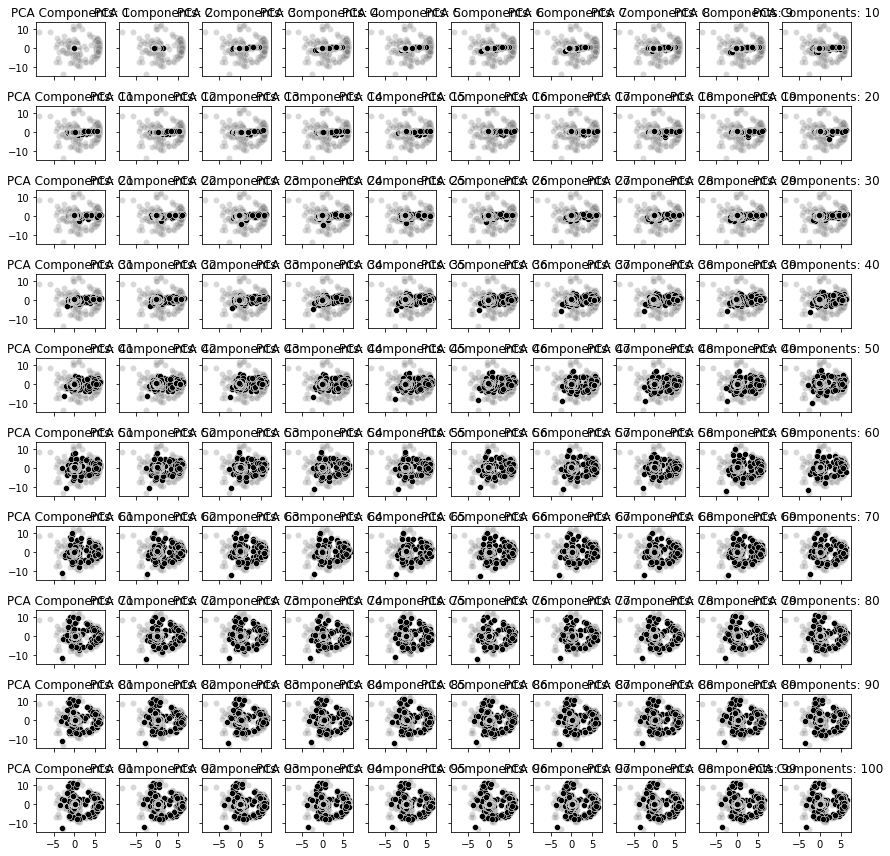

In [25]:

def transform_pca(X, n):

    pca = PCA(n_components=n)
    pca.fit(X)
    X_new = pca.inverse_transform(pca.transform(X))

    return X_new

rows = 10
cols = 10
comps = 1

X = x_train
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(rows,
                         cols,
                         figsize=(12,12),
                         sharex=True,
                         sharey=True)


for row in range(rows):
    for col in range(cols):
        try:
            X_new = transform_pca(X_scaled, comps)
            ax = sns.scatterplot(x=X_scaled[:, 0],
                                 y=X_scaled[:, 1],
                                 ax=axes[row, col],
                                 color='grey',
                                 alpha=.3)
            ax = sns.scatterplot(x=X_new[:, 0],
                                 y=X_new[:, 1],
                                 ax=axes[row, col],
                                 color='black')
            ax.set_title(f'PCA Components: {comps}');

            comps += 1
        except:
            pass
plt.tight_layout()
plt.show()


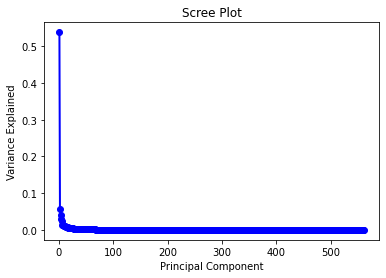

In [26]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## *Since 69 components can explain 90% of the dataset, the number of components was determined as 69.*

In [30]:
#PCA SCORES

pca = PCA(n_components=69)

pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.fit_transform(x_test)

In [34]:
pca_x_train = pd.DataFrame(pca_x_train)

In [35]:
pca_x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,3.31,0.78,-1.44,-0.03,-0.70,-0.74,-0.48,0.52,-0.15,-0.40,...,-0.25,-0.43,0.45,0.18,0.14,-0.61,-0.23,0.30,0.25,0.38
1,2.47,-0.40,-1.67,0.37,-0.41,-0.47,-0.17,0.89,0.11,-0.45,...,0.14,-0.44,0.42,0.25,0.32,0.07,-0.31,0.28,-0.31,-0.27
2,2.12,-0.14,-2.22,-0.01,-0.29,0.43,0.10,1.02,-0.10,-0.85,...,-0.13,-0.35,-0.00,-0.19,0.48,0.19,-0.28,-0.03,-0.21,0.09
3,1.74,0.62,-2.65,-0.37,-0.40,0.72,-0.06,0.30,-0.14,-0.37,...,-0.12,-0.34,-0.01,-0.12,0.33,-0.02,0.08,0.17,0.07,0.17
4,2.16,0.40,-2.17,0.26,-0.38,-0.28,-0.27,0.20,0.40,-0.00,...,-0.56,-0.22,0.25,0.05,-0.02,-0.47,-0.11,0.48,-0.05,0.08


In [37]:
pca_x_test = pd.DataFrame(pca_x_test)

In [38]:
pca_x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,-1.43,3.01,-0.23,-0.16,0.87,0.51,0.07,-0.15,-1.65,-0.94,...,-0.09,0.21,0.57,0.15,0.12,0.41,-0.05,0.62,-0.05,-0.24
1,-1.99,2.17,0.12,-0.34,1.84,-0.07,0.46,-0.39,-1.34,-0.65,...,-0.18,-0.18,0.45,0.19,-0.12,0.24,-0.17,0.53,-0.28,-0.15
2,-3.81,1.77,0.62,-0.32,1.24,-0.32,0.78,-0.94,-1.15,0.16,...,0.03,0.52,0.01,-0.39,-0.02,-0.05,-0.67,0.50,0.00,-0.11
3,-4.47,2.37,0.16,0.27,1.91,-1.43,2.57,-0.90,-0.27,-0.06,...,0.52,0.13,-0.01,-0.09,0.10,-0.33,-0.54,0.19,-0.04,-0.05
4,-4.89,2.23,0.55,0.25,1.70,-1.44,2.74,-0.60,-0.48,-0.16,...,0.52,0.39,0.05,-0.15,0.34,-0.25,-0.48,0.15,-0.00,0.10


#  ALL CLASSIFICATION MODELS WITH PCA_SCORE 
# 69 COMPONENTS , %90 VARIANCE RATIO

In [54]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

In [55]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(pca_x_train, pca_x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:09<00:00,  2.40s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.39,0.39,None,0.35,2.99
BaggingClassifier,0.38,0.37,None,0.34,3.95
RandomForestClassifier,0.36,0.35,None,0.32,4.42
LGBMClassifier,0.36,0.35,None,0.32,6.05
DecisionTreeClassifier,0.33,0.33,None,0.32,0.57
XGBClassifier,0.32,0.32,None,0.29,20.39
SGDClassifier,0.32,0.31,None,0.30,0.76
ExtraTreesClassifier,0.30,0.29,None,0.27,1.30
GaussianNB,0.29,0.28,None,0.25,0.11


# 108 COMPONENTS , %95 VARIANCE RATIO

In [56]:
#PCA SCORES

pca = PCA(n_components=108)

pca_x_train_2 = pca.fit_transform(x_train)
pca_x_test_2 = pca.fit_transform(x_test)

In [57]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(pca_x_train_2, pca_x_test_2, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:46<00:00,  3.66s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.39,0.40,None,0.36,6.38
BaggingClassifier,0.38,0.37,None,0.35,5.93
DecisionTreeClassifier,0.37,0.36,None,0.35,0.83
RandomForestClassifier,0.36,0.35,None,0.32,4.68
LGBMClassifier,0.35,0.34,None,0.31,12.22
ExtraTreesClassifier,0.34,0.34,None,0.32,1.97
XGBClassifier,0.33,0.31,None,0.29,41.79
SGDClassifier,0.31,0.30,None,0.27,0.67
GaussianNB,0.29,0.28,None,0.25,0.10


# LOGISTIC  REGRESSION 

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
logistic_model = LogisticRegression().fit(pca_x_train,y_train)

In [65]:
y_pred = logistic_model.predict(pca_x_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.29      0.27       243
           1       0.37      0.28      0.32       229
           2       0.26      0.23      0.24       239
           3       0.35      0.54      0.43       288
           4       0.20      0.14      0.17       254
           5       0.16      0.13      0.15       238

    accuracy                           0.28      1491
   macro avg       0.27      0.27      0.26      1491
weighted avg       0.27      0.28      0.27      1491



# Classification models with standardized pca_score ( 69 components )

In [76]:
from sklearn.preprocessing import StandardScaler

In [81]:
#### STANDARDIZATION ####

pca_x_train_scaled = StandardScaler().fit_transform(pca_x_train)
pca_x_train_scaled = pd.DataFrame(pca_x_train_scaled)

In [82]:
pca_x_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.60,0.44,-0.94,-0.03,-0.59,-0.81,-0.56,0.62,-0.19,-0.52,...,-0.90,-1.62,1.72,0.69,0.56,-2.35,-0.92,1.21,1.03,1.54
1,0.45,-0.22,-1.09,0.29,-0.35,-0.51,-0.20,1.07,0.14,-0.58,...,0.53,-1.66,1.57,0.96,1.24,0.26,-1.22,1.13,-1.25,-1.11
2,0.39,-0.08,-1.45,-0.01,-0.25,0.48,0.12,1.23,-0.12,-1.09,...,-0.46,-1.30,-0.01,-0.74,1.84,0.72,-1.10,-0.11,-0.87,0.35
3,0.32,0.35,-1.73,-0.29,-0.34,0.79,-0.07,0.36,-0.17,-0.48,...,-0.45,-1.27,-0.02,-0.46,1.27,-0.06,0.30,0.68,0.29,0.69
4,0.39,0.22,-1.42,0.21,-0.32,-0.31,-0.31,0.24,0.49,-0.00,...,-2.06,-0.82,0.95,0.18,-0.08,-1.81,-0.45,1.91,-0.22,0.34


In [83]:
#### STANDARDIZATION ####

pca_x_test_scaled = StandardScaler().fit_transform(pca_x_test)
pca_x_test_scaled = pd.DataFrame(pca_x_test_scaled)

In [84]:
pca_x_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,-0.25,1.52,-0.13,-0.11,0.72,0.48,0.07,-0.16,-1.90,-1.15,...,-0.33,0.75,2.09,0.54,0.46,1.53,-0.19,2.39,-0.20,-0.95
1,-0.35,1.09,0.07,-0.23,1.52,-0.06,0.46,-0.43,-1.55,-0.80,...,-0.62,-0.65,1.65,0.69,-0.46,0.90,-0.66,2.02,-1.09,-0.59
2,-0.67,0.89,0.36,-0.22,1.02,-0.30,0.78,-1.03,-1.33,0.19,...,0.12,1.87,0.05,-1.45,-0.06,-0.20,-2.54,1.92,0.00,-0.43
3,-0.79,1.19,0.09,0.19,1.58,-1.33,2.54,-0.99,-0.32,-0.07,...,1.83,0.45,-0.05,-0.33,0.39,-1.22,-2.06,0.74,-0.15,-0.19
4,-0.86,1.12,0.31,0.18,1.41,-1.34,2.72,-0.66,-0.55,-0.19,...,1.83,1.39,0.19,-0.55,1.26,-0.95,-1.81,0.59,-0.02,0.41


##### Classification models with standardized pca_score ( 69 components )

In [85]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(pca_x_train_scaled, pca_x_test_scaled, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:18<00:00,  2.72s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.39,0.39,None,0.35,3.15
BaggingClassifier,0.39,0.38,None,0.35,4.94
RandomForestClassifier,0.38,0.37,None,0.34,4.33
LGBMClassifier,0.36,0.35,None,0.32,6.76
DecisionTreeClassifier,0.35,0.34,None,0.33,0.61
XGBClassifier,0.33,0.32,None,0.29,21.53
SGDClassifier,0.31,0.30,None,0.29,0.63
ExtraTreesClassifier,0.30,0.29,None,0.27,1.70
ExtraTreeClassifier,0.28,0.28,None,0.28,0.11
